# **Importing Libraries**

In [3]:
# Install necessary libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load The Dataset**

In [4]:
url = "https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv"
data = pd.read_csv(url)

# **Explore the Dataset**

In [5]:
# Explore the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None

First few rows:
   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  

# **Drop Unnecessary Columns**

In [6]:
data = data.drop(['CustomerId', 'Surname'], axis=1)

## **Encode categorical variables (convert text to numbers)**

In [7]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

## **Define features (X) and target (y)**

In [8]:
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target

## **Standardize numerical features**

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Split the dataset into training and testing sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Build a Random Forest model**

In [11]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# **Evaluate The Model**

In [12]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.86

Confusion Matrix:
[[1545   62]
 [ 210  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## **Feature importance**

In [13]:
importances = model.feature_importances_
features = data.columns[:-1]
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

## **Plot feature importance**

<ipython-input-14-80c17723b0ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


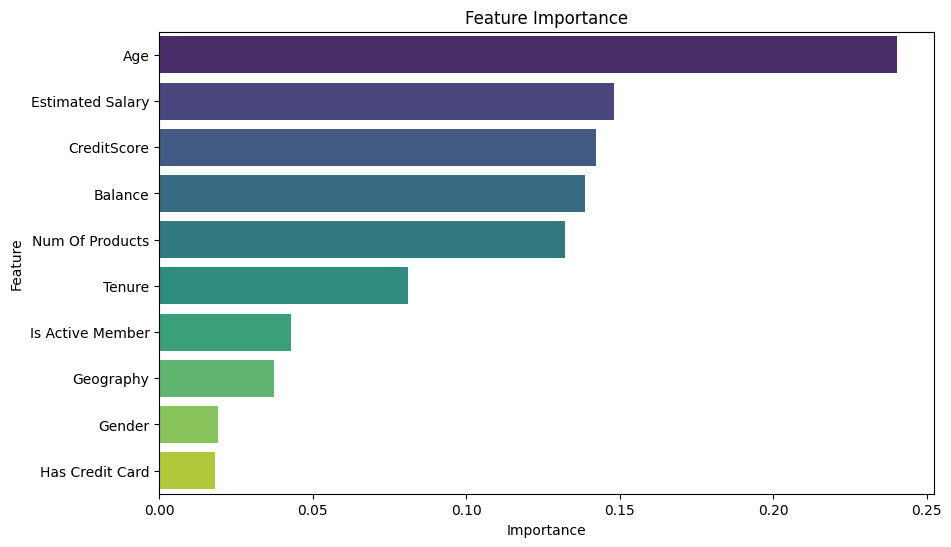

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()
